In [1]:
# Importing needed tools and dataset to complete visual and data analysis
# Source comes from the 2018 Stop, Question and Frisk data in 
# https://www1.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page
# Which is also a dataset file uploaded on canvas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv(r"C:\Users\CynMoreno.000\Downloads\2018_sqf_database-abbr.csv")
df

,STOP_FRISK_ID,Stop Frisk Time,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,SUPERVISING_OFFICER_RANK,SUPERVISING_OFFICER_COMMAND_CODE,...,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_HEIGHT,SUSPECT_WEIGHT,SUSPECT_BODY_BUILD_TYPE,SUSPECT_EYE_COLOR,SUSPECT_HAIR_COLOR,STOP_LOCATION_PRECINCT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_BORO_NAME
0,1,19:04:00,2018,January,Monday,Based on C/W on Scene,POM,1,SGT,1,...,MALE,WHITE,5.10,170.0,MED,BRO,BLK,1,VARICK STREET && FRANKLIN STREET,MANHATTAN
1,2,23:00:00,2018,January,Monday,Based on Radio Run,POM,34,SGT,34,...,MALE,BLACK HISPANIC,6.10,250.0,HEA,BRO,BLK,34,DYCKMAN STREET && POST AVENUE,MANHATTAN
2,3,23:55:00,2018,January,Monday,Based on Radio Run,POM,808,SGT,808,...,MALE,WHITE HISPANIC,5.50,150.0,THN,BRO,BLD,43,2245 RANDALL AVENUE,BRONX
3,4,3:23:00,2018,January,Monday,Based on Radio Run,POM,63,SGT,63,...,MALE,AMERICAN INDIAN/ALASKAN NATIVE,5.10,160.0,MED,BRO,BLK,63,EAST 38 STREET && AVENUE L,BROOKLYN
4,5,3:23:00,2018,January,Monday,Based on Radio Run,POM,63,SGT,63,...,MALE,WHITE,5.11,230.0,MED,BRO,BLK,63,EAST 38 STREET && AVENUE L,BROOKLYN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,11004,12:43:00,2018,December,Monday,Based on Radio Run,POM,121,SGT,121,...,MALE,BLACK,5.11,170.0,THN,BRO,BLD,121,2321 FOREST AVENUE,STATEN ISLAND
11004,11005,23:20:00,2018,December,Monday,Based on Radio Run,POM,32,LT,32,...,MALE,BLACK HISPANIC,5.10,170.0,THN,BRO,BLK,32,WEST 145 STREET && 7 AVENUE,MANHATTAN
11005,11006,23:20:00,2018,December,Monday,Based on Radio Run,POM,32,LT,32,...,MALE,BLACK HISPANIC,5.40,140.0,THN,BRO,BLK,32,WEST 145 STREET && 7 AVENUE,MANHATTAN
11006,11007,23:20:00,2018,December,Monday,Based on Radio Run,POM,32,LT,32,...,MALE,BLACK HISPANIC,5.40,130.0,THN,BRO,BLK,32,WEST 145 STREET && 7 AVENUE,MANHATTAN


In [2]:
# code to list all columns
df.columns

Index(['STOP_FRISK_ID', 'Stop Frisk Time', 'YEAR2', 'MONTH2', 'DAY2',
       'STOP_WAS_INITIATED', 'ISSUING_OFFICER_RANK',
       'ISSUING_OFFICER_COMMAND_CODE', 'SUPERVISING_OFFICER_RANK',
       'SUPERVISING_OFFICER_COMMAND_CODE', 'OBSERVED_DURATION_MINUTES',
       'SUSPECTED_CRIME_DESCRIPTION', 'STOP_DURATION_MINUTES',
       'OFFICER_EXPLAINED_STOP_FLAG', 'OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION',
       'SUSPECT_ARRESTED_FLAG', 'SUSPECT_ARREST_OFFENSE',
       'OFFICER_IN_UNIFORM_FLAG', 'FRISKED_FLAG', 'SEARCHED_FLAG',
       'OTHER_CONTRABAND_FLAG', 'FIREARM_FLAG', 'KNIFE_CUTTER_FLAG',
       'OTHER_WEAPON_FLAG', 'WEAPON_FOUND_FLAG', 'PHYSICAL_FORCE_CEW_FLAG',
       'PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG',
       'PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG',
       'PHYSICAL_FORCE_OC_SPRAY_USED_FLAG', 'PHYSICAL_FORCE_OTHER_FLAG',
       'PHYSICAL_FORCE_RESTRAINT_USED_FLAG',
       'PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG',
       'BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG',
       'B

In [3]:
# code to select specific columns into the new dataset
df = df[['Stop Frisk Time', 'SUSPECTED_CRIME_DESCRIPTION', 'SUSPECT_ARREST_OFFENSE','DEMEANOR_OF_PERSON_STOPPED','SUSPECT_REPORTED_AGE',
        'SUSPECT_SEX', 'SUSPECT_RACE_DESCRIPTION', 'SUSPECT_HEIGHT','SUSPECT_WEIGHT', 'SUSPECT_BODY_BUILD_TYPE','SUSPECT_EYE_COLOR', 'SUSPECT_HAIR_COLOR', 'STOP_LOCATION_BORO_NAME']]

In [4]:
# code to look at new dataset
df

,Stop Frisk Time,SUSPECTED_CRIME_DESCRIPTION,SUSPECT_ARREST_OFFENSE,DEMEANOR_OF_PERSON_STOPPED,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_HEIGHT,SUSPECT_WEIGHT,SUSPECT_BODY_BUILD_TYPE,SUSPECT_EYE_COLOR,SUSPECT_HAIR_COLOR,STOP_LOCATION_BORO_NAME
0,19:04:00,MENACING,0,COOPERATIVE,0,MALE,WHITE,5.10,170.0,MED,BRO,BLK,MANHATTAN
1,23:00:00,CPW,0,NERVOUS,26,MALE,BLACK HISPANIC,6.10,250.0,HEA,BRO,BLK,MANHATTAN
2,23:55:00,GRAND LARCENY,0,RELIEVED,40,MALE,WHITE HISPANIC,5.50,150.0,THN,BRO,BLD,BRONX
3,3:23:00,ROBBERY,ROBBERY,COMPLAIN,38,MALE,AMERICAN INDIAN/ALASKAN NATIVE,5.10,160.0,MED,BRO,BLK,BROOKLYN
4,3:23:00,ROBBERY,ROBBERY,COMPLAINT,36,MALE,WHITE,5.11,230.0,MED,BRO,BLK,BROOKLYN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,12:43:00,ROBBERY,PETIT LARCENY,AVOIDING EYE CONTACT BUT COMPLIANT,52,MALE,BLACK,5.11,170.0,THN,BRO,BLD,STATEN ISLAND
11004,23:20:00,PETIT LARCENY,0,CALM,26,MALE,BLACK HISPANIC,5.10,170.0,THN,BRO,BLK,MANHATTAN
11005,23:20:00,PETIT LARCENY,0,CALM,19,MALE,BLACK HISPANIC,5.40,140.0,THN,BRO,BLK,MANHATTAN
11006,23:20:00,PETIT LARCENY,0,CALM,17,MALE,BLACK HISPANIC,5.40,130.0,THN,BRO,BLK,MANHATTAN


In [5]:
# Look at the values in one column
df['SUSPECT_ARREST_OFFENSE'].value_counts()

0                                              7893
CPW                                             569
ROBBERY                                         452
PETIT LARCENY                                   393
ASSAULT                                         360
CRIMINAL TRESPASS                               296
OTHER                                           236
CRIMINAL POSSESSION OF CONTROLLED SUBSTANCE     134
BURGLARY                                        132
GRAND LARCENY                                   120
CRIMINAL MISCHIEF                                83
MENACING                                         64
CRIMINAL POSSESSION OF MARIHUANA                 51
CPSP                                             39
UNAUTHORIZED USE OF A VEHICLE                    38
GRAND LARCENY AUTO                               29
CRIMINAL SALE OF CONTROLLED SUBSTANCE            28
MAKING GRAFFITI                                  18
CRIMINAL POSSESSION OF FORGED INSTRUMENT         14
RECKLESS END

In [6]:
# Converting category into people arrested and innoncent to compare what happened after stop-and-frisk
def function(row):
    if row['SUSPECT_ARREST_OFFENSE'] == '0':
        return 'Innocent'
    else:
        return 'Arrested'

In [7]:
# Code to add new colum "Result of stop" to the specific dataset
df['Result of stop'] = df.apply(function, axis=1)

<ipython-input-7-794e8e109a51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Result of stop'] = df.apply(function, axis=1)


In [8]:
# code to look at the values under new column
df['Result of stop'].value_counts()

Innocent    7893
Arrested    3115
Name: Result of stop, dtype: int64

In [9]:
# # code to look at new dataset
df

,Stop Frisk Time,SUSPECTED_CRIME_DESCRIPTION,SUSPECT_ARREST_OFFENSE,DEMEANOR_OF_PERSON_STOPPED,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_HEIGHT,SUSPECT_WEIGHT,SUSPECT_BODY_BUILD_TYPE,SUSPECT_EYE_COLOR,SUSPECT_HAIR_COLOR,STOP_LOCATION_BORO_NAME,Result of stop
0,19:04:00,MENACING,0,COOPERATIVE,0,MALE,WHITE,5.10,170.0,MED,BRO,BLK,MANHATTAN,Innocent
1,23:00:00,CPW,0,NERVOUS,26,MALE,BLACK HISPANIC,6.10,250.0,HEA,BRO,BLK,MANHATTAN,Innocent
2,23:55:00,GRAND LARCENY,0,RELIEVED,40,MALE,WHITE HISPANIC,5.50,150.0,THN,BRO,BLD,BRONX,Innocent
3,3:23:00,ROBBERY,ROBBERY,COMPLAIN,38,MALE,AMERICAN INDIAN/ALASKAN NATIVE,5.10,160.0,MED,BRO,BLK,BROOKLYN,Arrested
4,3:23:00,ROBBERY,ROBBERY,COMPLAINT,36,MALE,WHITE,5.11,230.0,MED,BRO,BLK,BROOKLYN,Arrested
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,12:43:00,ROBBERY,PETIT LARCENY,AVOIDING EYE CONTACT BUT COMPLIANT,52,MALE,BLACK,5.11,170.0,THN,BRO,BLD,STATEN ISLAND,Arrested
11004,23:20:00,PETIT LARCENY,0,CALM,26,MALE,BLACK HISPANIC,5.10,170.0,THN,BRO,BLK,MANHATTAN,Innocent
11005,23:20:00,PETIT LARCENY,0,CALM,19,MALE,BLACK HISPANIC,5.40,140.0,THN,BRO,BLK,MANHATTAN,Innocent
11006,23:20:00,PETIT LARCENY,0,CALM,17,MALE,BLACK HISPANIC,5.40,130.0,THN,BRO,BLK,MANHATTAN,Innocent


In [10]:
# Creating a summary stat function with the following
def summary_statistics(df, variable):
    value = df[variable].dropna()
    print('Average:', np.mean(value))
    print('Median:', np.median(value))
    print('Variance:', np.var(value))
    q1 = np.percentile(value, 25, interpolation='midpoint')
    q3 = np.percentile(value, 75, interpolation='midpoint')
    print('IQR:', q3-q1)

In [11]:
# Isolate the age column
age_df = df[['SUSPECT_REPORTED_AGE']]

In [12]:
# code to view this dataframe
age_df

,SUSPECT_REPORTED_AGE
0,0
1,26
2,40
3,38
4,36
...,...
11003,52
11004,26
11005,19
11006,17


In [13]:
# Drop age value = 0 as these represent NANs without deleting values from other columns
age_df = age_df[age_df.SUSPECT_REPORTED_AGE != 0]

In [14]:
# code to view dataframe of age_df without any zeros
age_df

,SUSPECT_REPORTED_AGE
1,26
2,40
3,38
4,36
5,20
...,...
11003,52
11004,26
11005,19
11006,17


In [15]:
# Using summary stat function on the new age dataframe
print('Summary Statistics for age:')
summary_statistics(age_df, 'SUSPECT_REPORTED_AGE')

Summary Statistics for age:
Average: 29.371912975303804
Median: 26.0
Variance: 150.9754596490315
IQR: 16.0


In [16]:
# Confirming values of 0 have been deleted
age_df['SUSPECT_REPORTED_AGE']

1        26
2        40
3        38
4        36
5        20
         ..
11003    52
11004    26
11005    19
11006    17
11007    32
Name: SUSPECT_REPORTED_AGE, Length: 10204, dtype: int64

In [17]:
# Separating data frame into two groups: children (those 18 and under) and adults (anyone over 18)

children_df = age_df[age_df['SUSPECT_REPORTED_AGE'] <= 18]

adult_df = age_df[age_df['SUSPECT_REPORTED_AGE'] > 18]


In [18]:
# Using summary stat function on new dataframe
print('Summary Statistics for Children:')
summary_statistics(children_df, 'SUSPECT_REPORTED_AGE')
print('--------------------------------')
print('Summary Statistics for Adults:')
summary_statistics(adult_df, 'SUSPECT_REPORTED_AGE')
print('--------------------------------')

Summary Statistics for Children:
Average: 16.151309408341415
Median: 16.0
Variance: 2.5551849973799725
IQR: 2.0
--------------------------------
Summary Statistics for Adults:
Average: 32.72009334315893
Median: 30.0
Variance: 133.08831893012288
IQR: 16.0
--------------------------------


In [19]:
# code to view values specific to this column and verify dataframe is correct
children_df

,SUSPECT_REPORTED_AGE
12,17
15,18
25,18
28,15
36,17
...,...
10969,18
10991,18
10999,16
11000,18


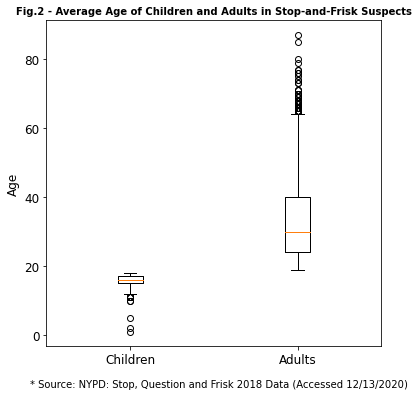

In [20]:
# box plot graph being used to look at the average age of children and adult suspects, and find the mean difference
fig, axs = plt.subplots(figsize=(6,6))
axs.boxplot([children_df['SUSPECT_REPORTED_AGE'],adult_df['SUSPECT_REPORTED_AGE']])
plt.title('Fig.2 - Average Age of Children and Adults in Stop-and-Frisk Suspects', fontsize=10, fontweight="bold")
axs.set_xticklabels(['Children','Adults'])
axs.set_ylabel('Age', fontsize=12)
axs.tick_params(labelsize=12)

# The plt.text() argument adds a text for caption and the souce of the dataset
txt1 = '* Source: NYPD: Stop, Question and Frisk 2018 Data (Accessed 12/13/2020)'
plt.text(.4, -15, txt1, ha='left', fontsize=10)
plt.show()
plt.show()

In [21]:
# Obtaining average mean of age from both groups
print("Mean Children age:", np.mean(children_df['SUSPECT_REPORTED_AGE']))
print("Mean Adult age:", np.mean(adult_df['SUSPECT_REPORTED_AGE']))

Mean Children age: 16.151309408341415
Mean Adult age: 32.72009334315893


In [22]:
# Computing 95% CI of the mean through the following function:

def CI_mean(data):
    se = np.std(data)/np.sqrt(len(data))
    low = np.mean(data)-1.96*se
    up = np.mean(data)+1.96*se
    print("Average is:", np.mean(data))
    print("95% CI of mean is: ({}, {})".format(low,up))

In [23]:
# 95% CI of mean children age
CI_mean(children_df['SUSPECT_REPORTED_AGE'])

Average is: 16.151309408341415
95% CI of mean is: (16.08231356692435, 16.220305249758482)


In [24]:
# 95% CI of mean adult age
CI_mean(adult_df['SUSPECT_REPORTED_AGE'])

Average is: 32.72009334315893
95% CI of mean is: (32.469505215001945, 32.97068147131591)


In [25]:
# Computing 95% CI of mean difference
def CI_mean_diff(list1, list2):
    s1 = np.var(list1)
    s2 = np.var(list2)
    n1 = len(list1)
    n2 = len(list2)
    se2 = s1/n1 + s2/n2
    se = np.sqrt(se2)

    diff = np.mean(list1) - np.mean(list2)
    low = diff - 1.96 * se
    up = diff + 1.96 * se
    print("The average difference is:", diff)
    print("The 95% CI is: ({}, {})".format(low, up))

In [26]:
# Results of the average mean difference between adult and children to identify how close a range is the average suspects' age.
CI_mean_diff(adult_df['SUSPECT_REPORTED_AGE'], children_df['SUSPECT_REPORTED_AGE'])

The average difference is: 16.568783934817514
The 95% CI is: (16.308870802971374, 16.828697066663654)


In [27]:
# This is to compare the mean difference of both groups, using two sample t-test
t_val, p_val = stats.ttest_ind(adult_df['SUSPECT_REPORTED_AGE'],children_df['SUSPECT_REPORTED_AGE'], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 124.93561754097541
p-value: 0.0


In [28]:
# This data provides evidence that the average difference is statistically significant (p<0.001; two sample t-test). 
# The adult age mean difference was estimated to exceed the children mean age by 16.57 (95% CI = [16.31,16.83]). 
# The average adults’ age is 33 years old and the average children’s age is 16 years old.

In [29]:
# Separating data frame into male, female and using adult/child dataframe

children_df = age_df['SUSPECT_REPORTED_AGE'] <= 18
adult_df = age_df['SUSPECT_REPORTED_AGE'] > 18

male = df['SUSPECT_SEX'] == 'MALE'
female = df['SUSPECT_SEX'] == 'FEMALE'

male_adult_df = df[adult_df & male]
female_adult_df = df[adult_df & female]

male_children_df = df[children_df & male]
female_children_df = df[children_df & female]

In [30]:
# Using summary stat function on new dataframe

print('Summary Statistics for Male Adults:')
summary_statistics(male_adult_df, 'SUSPECT_REPORTED_AGE')
print('-----------------------------------')
print('Summary Statistics for Female Adults:')
summary_statistics(female_adult_df, 'SUSPECT_REPORTED_AGE')
print('-------------------------------------')
print('Summary Statistics for Male Children:')
summary_statistics(male_children_df, 'SUSPECT_REPORTED_AGE')
print('-------------------------------------')
print('Summary Statistics for Female Children:')
summary_statistics(female_children_df, 'SUSPECT_REPORTED_AGE')
print('---------------------------------------')

Summary Statistics for Male Adults:
Average: 32.77604237403232
Median: 30.0
Variance: 132.76269100567256
IQR: 16.0
-----------------------------------
Summary Statistics for Female Adults:
Average: 32.16531165311653
Median: 29.0
Variance: 133.94015173214024
IQR: 16.0
-------------------------------------
Summary Statistics for Male Children:
Average: 16.162292447777183
Median: 16.0
Variance: 2.515171605958007
IQR: 2.0
-------------------------------------
Summary Statistics for Female Children:
Average: 16.036269430051814
Median: 16.0
Variance: 2.9468710569411245
IQR: 2.0
---------------------------------------


In [31]:
# bins = (325-80)/9=27+1 = 28

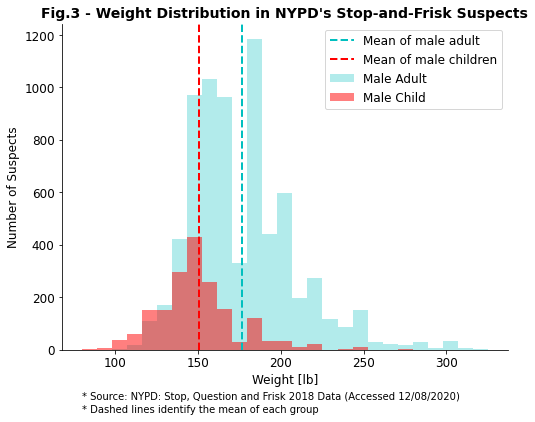

In [32]:
# Grouped histogram used to ilustrate weight distribution among male adults and children.
fig, axs = plt.subplots(figsize=(8,6))
axs.hist(male_adult_df['SUSPECT_WEIGHT'], color="c", alpha=0.3, 
         bins=np.linspace(80,325,28), label="Male Adult")

axs.hist(male_children_df['SUSPECT_WEIGHT'], color="r", alpha=0.5,
         bins=np.linspace(80,325,28), label="Male Child")

plt.title("Fig.3 - Weight Distribution in NYPD's Stop-and-Frisk Suspects", fontsize=14, fontweight="bold")
axs.set_xlabel("Weight [lb]", fontsize=12)
axs.set_ylabel("Number of Suspects", fontsize=12)
axs.tick_params(labelsize=12)
axs.axvline(np.mean(male_adult_df['SUSPECT_WEIGHT']), color='c', ls='dashed', lw=2, label = 'Mean of male adult')

axs.axvline(np.mean(male_children_df['SUSPECT_WEIGHT']), color='r', ls='dashed', lw=2, label = 'Mean of male children')

axs.legend(prop={'size': 12})

axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)

txt1 = '* Source: NYPD: Stop, Question and Frisk 2018 Data (Accessed 12/08/2020)'
plt.text(80,-190, txt1, ha='left', fontsize=10)
txt2 = '* Dashed lines identify the mean of each group'
plt.text(80,-240, txt2, ha='left', fontsize=10)
plt.show()

In [33]:
# Average weight of both groups
print("Mean male adult weight:", np.mean(male_adult_df['SUSPECT_WEIGHT'].dropna()))
print("Mean male child weight:", np.mean(male_children_df['SUSPECT_WEIGHT'].dropna()))

Mean male adult weight: 176.54563053097345
Mean male child weight: 150.69508196721313


In [34]:
# Calculating 95% CI of the mean by using the following function
def CI_mean(data):
    se = np.std(data)/np.sqrt(len(data))
    low = np.mean(data)-1.96*se
    up = np.mean(data)+1.96*se
    print("Average is:", np.mean(data))
    print("95% CI of mean is: ({}, {})".format(low,up))

In [35]:
# This is the 95% CI of mean male adult weight
CI_mean(male_adult_df['SUSPECT_WEIGHT'])

Average is: 176.54563053097345
95% CI of mean is: (175.8130488260134, 177.27821223593352)


In [36]:
# This is the 95% CI of mean male children weight
CI_mean(male_children_df['SUSPECT_WEIGHT'])

Average is: 150.69508196721313
95% CI of mean is: (149.4633693625051, 151.92679457192116)


In [37]:
# This is the function to compute 95% CI of mean difference:

def CI_mean_diff(list1, list2):
    s1 = np.var(list1)
    s2 = np.var(list2)
    n1 = len(list1)
    n2 = len(list2)
    se2 = s1/n1 + s2/n2
    se = np.sqrt(se2)

    diff = np.mean(list1) - np.mean(list2)
    low = diff - 1.96 * se
    up = diff + 1.96 * se
    print("The average difference is:", diff)
    print("The 95% CI is: ({}, {})".format(low, up))

In [38]:
# This is the average difference of weight between male adult and children suspects
CI_mean_diff(male_adult_df['SUSPECT_WEIGHT'], male_children_df['SUSPECT_WEIGHT'])

The average difference is: 25.850548563760327
The 95% CI is: (24.417442882019145, 27.28365424550151)


In [39]:
# Now I'd like to conduct a two sample t-test

t_val, p_val = stats.ttest_ind(male_adult_df['SUSPECT_WEIGHT'].dropna(), male_children_df['SUSPECT_WEIGHT'].dropna(), equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 35.004391193787534
p-value: 4.977103434723524e-228


In [40]:
# Result:
# The relationship between male adults and male children weight is statistically significant (p < 0.001; two sample t-test).
# In reference to the 2018 NYPD Stop-and-Frisk data, the mean difference of the male adult weight and the male children's weight is 
# 25.85 pounds (95% CI = [24.42, 27.28]).

In [41]:
# Observing a specific column
df['Result of stop']

0        Innocent
1        Innocent
2        Innocent
3        Arrested
4        Arrested
           ...   
11003    Arrested
11004    Innocent
11005    Innocent
11006    Innocent
11007    Innocent
Name: Result of stop, Length: 11008, dtype: object

In [42]:
# Function to turn innoncent reports = 0 and arrested reports = 1 in order to translate into numerical values.
def function(row):
    if row['Result of stop'] == 'Innocent':
        return '0'
    else:
        return '1'

In [43]:
# Adding variable in a new column to the data frame
df['Measurable_Result of stop'] = df.apply(function, axis=1)

<ipython-input-43-69dfc362a0a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Measurable_Result of stop'] = df.apply(function, axis=1)


In [44]:
# This df contains new column: Measurable_Result of stop
df

,Stop Frisk Time,SUSPECTED_CRIME_DESCRIPTION,SUSPECT_ARREST_OFFENSE,DEMEANOR_OF_PERSON_STOPPED,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_HEIGHT,SUSPECT_WEIGHT,SUSPECT_BODY_BUILD_TYPE,SUSPECT_EYE_COLOR,SUSPECT_HAIR_COLOR,STOP_LOCATION_BORO_NAME,Result of stop,Measurable_Result of stop
0,19:04:00,MENACING,0,COOPERATIVE,0,MALE,WHITE,5.10,170.0,MED,BRO,BLK,MANHATTAN,Innocent,0
1,23:00:00,CPW,0,NERVOUS,26,MALE,BLACK HISPANIC,6.10,250.0,HEA,BRO,BLK,MANHATTAN,Innocent,0
2,23:55:00,GRAND LARCENY,0,RELIEVED,40,MALE,WHITE HISPANIC,5.50,150.0,THN,BRO,BLD,BRONX,Innocent,0
3,3:23:00,ROBBERY,ROBBERY,COMPLAIN,38,MALE,AMERICAN INDIAN/ALASKAN NATIVE,5.10,160.0,MED,BRO,BLK,BROOKLYN,Arrested,1
4,3:23:00,ROBBERY,ROBBERY,COMPLAINT,36,MALE,WHITE,5.11,230.0,MED,BRO,BLK,BROOKLYN,Arrested,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,12:43:00,ROBBERY,PETIT LARCENY,AVOIDING EYE CONTACT BUT COMPLIANT,52,MALE,BLACK,5.11,170.0,THN,BRO,BLD,STATEN ISLAND,Arrested,1
11004,23:20:00,PETIT LARCENY,0,CALM,26,MALE,BLACK HISPANIC,5.10,170.0,THN,BRO,BLK,MANHATTAN,Innocent,0
11005,23:20:00,PETIT LARCENY,0,CALM,19,MALE,BLACK HISPANIC,5.40,140.0,THN,BRO,BLK,MANHATTAN,Innocent,0
11006,23:20:00,PETIT LARCENY,0,CALM,17,MALE,BLACK HISPANIC,5.40,130.0,THN,BRO,BLK,MANHATTAN,Innocent,0


In [45]:
# Looking at value count of this column
df['Result of stop'].value_counts()

Innocent    7893
Arrested    3115
Name: Result of stop, dtype: int64

In [46]:
# Installing statsmodel in order to do statistical analysis
!pip install statsmodels --user

In [47]:
# Separating data frame into innocent and arrested group according to its numerical value
innocent_df = df[df['Measurable_Result of stop'] == '0']
arrested_df = df[df['Measurable_Result of stop'] == '1']

In [48]:
# creating new data frame of arrested group and looking at two variables: age and height.
new_df = arrested_df.dropna(subset=['SUSPECT_REPORTED_AGE','SUSPECT_HEIGHT'])

In [49]:
# Drop age value = 0 as these represent NANs without deleting values from other columns
new_df = new_df[new_df.SUSPECT_REPORTED_AGE != 0]

In [50]:
# code to view this data frame
new_df

,Stop Frisk Time,SUSPECTED_CRIME_DESCRIPTION,SUSPECT_ARREST_OFFENSE,DEMEANOR_OF_PERSON_STOPPED,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_HEIGHT,SUSPECT_WEIGHT,SUSPECT_BODY_BUILD_TYPE,SUSPECT_EYE_COLOR,SUSPECT_HAIR_COLOR,STOP_LOCATION_BORO_NAME,Result of stop,Measurable_Result of stop
3,3:23:00,ROBBERY,ROBBERY,COMPLAIN,38,MALE,AMERICAN INDIAN/ALASKAN NATIVE,5.10,160.0,MED,BRO,BLK,BROOKLYN,Arrested,1
4,3:23:00,ROBBERY,ROBBERY,COMPLAINT,36,MALE,WHITE,5.11,230.0,MED,BRO,BLK,BROOKLYN,Arrested,1
6,0:00:00,CPW,CPW,NaN,46,MALE,BLACK,5.70,215.0,HEA,BRO,BLK,BROOKLYN,Arrested,1
7,0:00:00,CPW,CPW,NaN,36,MALE,BLACK,5.80,170.0,XXX,BRO,BLK,BROOKLYN,Arrested,1
8,0:00:00,CPW,CPW,NaN,29,MALE,BLACK,6.10,185.0,XXX,BRO,BLK,BROOKLYN,Arrested,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10991,1:35:00,CPSP,CPSP,CALM,18,MALE,WHITE HISPANIC,5.10,180.0,MED,BRO,BLK,BRONX,Arrested,1
10992,1:34:00,CPSP,OTHER,CALM,21,MALE,WHITE HISPANIC,5.70,160.0,THN,BRO,BLK,BRONX,Arrested,1
10993,1:31:00,CRIMINAL MISCHIEF,OTHER,ANXIOUS,20,MALE,WHITE HISPANIC,5.10,160.0,THN,BRO,BLD,BRONX,Arrested,1
11001,21:49:00,ASSAULT,ASSAULT,"CALM, UNDERSTANDING",25,MALE,WHITE HISPANIC,5.50,180.0,U,BRO,BLK,QUEENS,Arrested,1


In [51]:
# Using summary stat function on new dataframe
print('Summary Statistics of age for Arrested Suspects:')
summary_statistics(new_df, 'SUSPECT_REPORTED_AGE')
print('------------------------------------------------')
print('Summary Statistics of height for Arrested Suspects:')
summary_statistics(new_df, 'SUSPECT_HEIGHT')
print('---------------------------------------------------')

Summary Statistics of age for Arrested Suspects:
Average: 30.03379056540649
Median: 27.0
Variance: 158.3638632160902
IQR: 18.0
------------------------------------------------
Summary Statistics of height for Arrested Suspects:
Average: 5.647009033121486
Median: 5.7
Variance: 0.14983936458886268
IQR: 0.6000000000000005
---------------------------------------------------


In [52]:
# creating new data frame of the innocent group and looking at two variables: age and height.
new_df1 = innocent_df.dropna(subset=['SUSPECT_REPORTED_AGE','SUSPECT_HEIGHT'])

In [53]:
# Drop age value = 0 as these represent NANs without deleting values from other columns
new_df1 = new_df1[new_df1.SUSPECT_REPORTED_AGE != 0]

In [54]:
# code to view this data frame
new_df1

,Stop Frisk Time,SUSPECTED_CRIME_DESCRIPTION,SUSPECT_ARREST_OFFENSE,DEMEANOR_OF_PERSON_STOPPED,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_HEIGHT,SUSPECT_WEIGHT,SUSPECT_BODY_BUILD_TYPE,SUSPECT_EYE_COLOR,SUSPECT_HAIR_COLOR,STOP_LOCATION_BORO_NAME,Result of stop,Measurable_Result of stop
1,23:00:00,CPW,0,NERVOUS,26,MALE,BLACK HISPANIC,6.1,250.0,HEA,BRO,BLK,MANHATTAN,Innocent,0
2,23:55:00,GRAND LARCENY,0,RELIEVED,40,MALE,WHITE HISPANIC,5.5,150.0,THN,BRO,BLD,BRONX,Innocent,0
5,21:20:00,UNAUTHORIZED USE OF A VEHICLE,0,NERVOUS,20,MALE,BLACK,5.1,150.0,THN,BRO,BLK,BROOKLYN,Innocent,0
11,1:35:00,OTHER,0,CALM,53,MALE,WHITE,5.8,190.0,XXX,BLK,BLK,BROOKLYN,Innocent,0
12,1:35:00,OTHER,0,CALM,17,MALE,WHITE,5.8,150.0,XXX,BRO,BLK,BROOKLYN,Innocent,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11002,18:30:00,BURGLARY,0,INTOXICATED,41,MALE,WHITE HISPANIC,5.5,200.0,HEA,BRO,BLK,QUEENS,Innocent,0
11004,23:20:00,PETIT LARCENY,0,CALM,26,MALE,BLACK HISPANIC,5.1,170.0,THN,BRO,BLK,MANHATTAN,Innocent,0
11005,23:20:00,PETIT LARCENY,0,CALM,19,MALE,BLACK HISPANIC,5.4,140.0,THN,BRO,BLK,MANHATTAN,Innocent,0
11006,23:20:00,PETIT LARCENY,0,CALM,17,MALE,BLACK HISPANIC,5.4,130.0,THN,BRO,BLK,MANHATTAN,Innocent,0


In [55]:
# Using summary stat function on new dataframe
print('Summary Statistics of age for Innocent Suspects:')
summary_statistics(new_df1, 'SUSPECT_REPORTED_AGE')
print('------------------------------------------------')
print('Summary Statistics of height for Innocent Suspects:')
summary_statistics(new_df1, 'SUSPECT_HEIGHT')
print('---------------------------------------------------')

Summary Statistics of age for Innocent Suspects:
Average: 29.117772714326403
Median: 26.0
Variance: 147.8093993114829
IQR: 16.0
------------------------------------------------
Summary Statistics of height for Innocent Suspects:
Average: 5.637315579606901
Median: 5.7
Variance: 0.14489283661001418
IQR: 0.6000000000000005
---------------------------------------------------


In [56]:
# This is the code to complete a simple linear regression analysis
# Linear regression is used to examine the relationship between two numerical variables

from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals = new_df['SUSPECT_REPORTED_AGE'].values
y_vals = new_df['SUSPECT_HEIGHT']

reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         SUSPECT_HEIGHT   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     8.734
Date:                Sun, 20 Dec 2020   Prob (F-statistic):            0.00315
Time:                        11:03:30   Log-Likelihood:                -1400.0
No. Observations:                2989   AIC:                             2804.
Df Residuals:                    2987   BIC:                             2816.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5971      0.018    305.843      0.000       5.561       5.633
x1             0.0017      0.001      2.955      0.003       0.001       0.003
==============================================================================
Omnibus:                       39.601   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.000
Skew:                          -0.285   Prob(JB):                     1.25e-09
Kurtosis:                       2.938   Cond. No.                         84.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# identifying bins space that will be used in graph below
b0 = reg_model.params[0]
b1 = reg_model.params[1]
x_plot = np.linspace(np.min(new_df['SUSPECT_REPORTED_AGE']),
                     np.max(new_df['SUSPECT_REPORTED_AGE']), 100)

In [58]:
# list between bins space
x_plot

array([10.        , 10.67676768, 11.35353535, 12.03030303, 12.70707071,
       13.38383838, 14.06060606, 14.73737374, 15.41414141, 16.09090909,
       16.76767677, 17.44444444, 18.12121212, 18.7979798 , 19.47474747,
       20.15151515, 20.82828283, 21.50505051, 22.18181818, 22.85858586,
       23.53535354, 24.21212121, 24.88888889, 25.56565657, 26.24242424,
       26.91919192, 27.5959596 , 28.27272727, 28.94949495, 29.62626263,
       30.3030303 , 30.97979798, 31.65656566, 32.33333333, 33.01010101,
       33.68686869, 34.36363636, 35.04040404, 35.71717172, 36.39393939,
       37.07070707, 37.74747475, 38.42424242, 39.1010101 , 39.77777778,
       40.45454545, 41.13131313, 41.80808081, 42.48484848, 43.16161616,
       43.83838384, 44.51515152, 45.19191919, 45.86868687, 46.54545455,
       47.22222222, 47.8989899 , 48.57575758, 49.25252525, 49.92929293,
       50.60606061, 51.28282828, 51.95959596, 52.63636364, 53.31313131,
       53.98989899, 54.66666667, 55.34343434, 56.02020202, 56.69

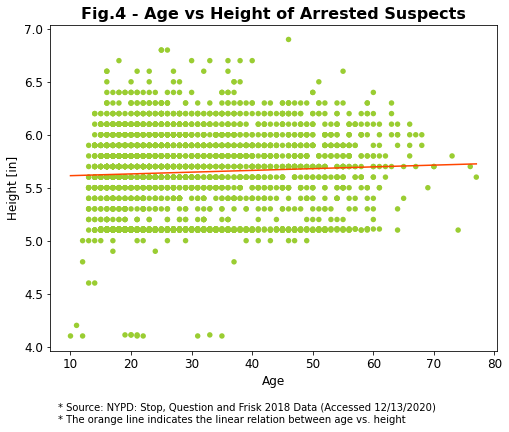

In [59]:
# scatter plot graph of age and height among arrested suspects
# Linear relation line was identified and added to the graph
fig, axs = plt.subplots(figsize=(8,6))
axs.scatter(new_df['SUSPECT_REPORTED_AGE'], new_df['SUSPECT_HEIGHT'], c='yellowgreen',
            edgecolors='none', s=30)
axs.plot(x_plot, x_plot*b1 + b0, color='orangered')
plt.title("Fig.4 - Age vs Height of Arrested Suspects", fontsize=16, fontweight="bold")
axs.set_xlabel("Age", fontsize=12)
axs.set_ylabel("Height [in]", fontsize=12)
axs.tick_params(labelsize=12)

txt1 = '* Source: NYPD: Stop, Question and Frisk 2018 Data (Accessed 12/13/2020)'
plt.text(8,3.4, txt1, ha='left', fontsize=10)
txt2 = '* The orange line indicates the linear relation between age vs. height'
plt.text(8,3.28, txt2, ha='left', fontsize=10)
plt.show()


In [60]:
# Because there was a diverse list of arrests, the values in “Result of stop” were divided into “arrested” and “innocent”. 
# Then, these were translated into a numerical variable where arrested represents 1 and innocent represents 0. 
# Results from the scatter plot show that the relationship between both numerical variables, age and height of people 
# who were found arrested, is strong. This was statistically significant, thus regression line was obtained
# P< 0.001; linear regression (95% CI=[5.561,5.633])

In [61]:
# This scatter plot was not used in the research paper
# This is the code to complete a simple linear regression analysis between age and height of innocent suspects
# Linear regression is used to examine the relationship between two numerical variables
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals1 = new_df1['SUSPECT_REPORTED_AGE'].values
y_vals1 = new_df1['SUSPECT_HEIGHT']

reg_model = OLS(y_vals1, sm.add_constant(x_vals1)).fit()
display(reg_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         SUSPECT_HEIGHT   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     24.81
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           6.49e-07
Time:                        11:03:31   Log-Likelihood:                -3169.0
No. Observations:                7022   AIC:                             6342.
Df Residuals:                    7020   BIC:                             6356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5832      0.012    474.343      0.000       5.560       5.606
x1             0.0019      0.000      4.981      0.000       0.001       0.003
==============================================================================
Omnibus:                      177.440   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.151
Skew:                          -0.355   Prob(JB):                     1.27e-44
Kurtosis:                       3.432   Cond. No.                         82.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# identifying bins space that will be used in graph below
b0 = reg_model.params[0]
b1 = reg_model.params[1]
x_plot1 = np.linspace(np.min(new_df1['SUSPECT_REPORTED_AGE']),
                     np.max(new_df1['SUSPECT_REPORTED_AGE']), 100)

In [63]:
# list between bins space
x_plot1

array([ 1.        ,  1.86868687,  2.73737374,  3.60606061,  4.47474747,
        5.34343434,  6.21212121,  7.08080808,  7.94949495,  8.81818182,
        9.68686869, 10.55555556, 11.42424242, 12.29292929, 13.16161616,
       14.03030303, 14.8989899 , 15.76767677, 16.63636364, 17.50505051,
       18.37373737, 19.24242424, 20.11111111, 20.97979798, 21.84848485,
       22.71717172, 23.58585859, 24.45454545, 25.32323232, 26.19191919,
       27.06060606, 27.92929293, 28.7979798 , 29.66666667, 30.53535354,
       31.4040404 , 32.27272727, 33.14141414, 34.01010101, 34.87878788,
       35.74747475, 36.61616162, 37.48484848, 38.35353535, 39.22222222,
       40.09090909, 40.95959596, 41.82828283, 42.6969697 , 43.56565657,
       44.43434343, 45.3030303 , 46.17171717, 47.04040404, 47.90909091,
       48.77777778, 49.64646465, 50.51515152, 51.38383838, 52.25252525,
       53.12121212, 53.98989899, 54.85858586, 55.72727273, 56.5959596 ,
       57.46464646, 58.33333333, 59.2020202 , 60.07070707, 60.93

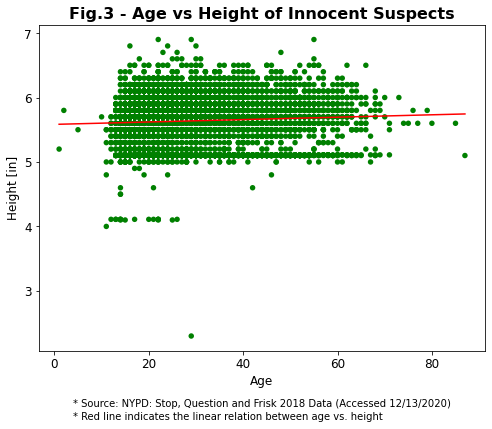

In [64]:
# scatter plot graph of age and height among innocent suspects
# Linear relation line was identified and added to the graph
fig, axs = plt.subplots(figsize=(8,6))
axs.scatter(new_df1['SUSPECT_REPORTED_AGE'], new_df1['SUSPECT_HEIGHT'], c='green',
            edgecolors='none', s=30)
axs.plot(x_plot1, x_plot1*b1 + b0, color='red')
plt.title("Fig.3 - Age vs Height of Innocent Suspects", fontsize=16, fontweight="bold")
axs.set_xlabel("Age", fontsize=12)
axs.set_ylabel("Height [in]", fontsize=12)
axs.tick_params(labelsize=12)

txt1 = '* Source: NYPD: Stop, Question and Frisk 2018 Data (Accessed 12/13/2020)'
plt.text(4,1.2, txt1, ha='left', fontsize=10)
txt2 = '* Red line indicates the linear relation between age vs. height'
plt.text(4,1, txt2, ha='left', fontsize=10)
plt.show()

In [65]:
# The relationship found was statistically significant, thus regression line was obtained
# P< 0.001; linear regression (95% CI=[5.560,5.606])

In [66]:
# Hypothesis between eye color and result of stop-and-frisk

In [67]:
# looking at value counts under this column/variable
df['SUSPECT_EYE_COLOR'].value_counts()

BRO    9024
BLK    1025
ZZZ     375
0       210
BLU     157
GRN      98
HAZ      91
GRY      21
MUL       5
OTH       2
Name: SUSPECT_EYE_COLOR, dtype: int64

In [68]:
# Code for two way frequency table of result of stop and eye color
eye_color_df = pd.crosstab(index=df["Measurable_Result of stop"], columns=df["SUSPECT_EYE_COLOR"]) 

In [69]:
# two frequency table defined
eye_color_df

SUSPECT_EYE_COLOR,0,BLK,BLU,BRO,GRN,GRY,HAZ,MUL,OTH,ZZZ
Measurable_Result of stop,,,,,,,,,,
0,177,725,92,6433,62,17,51,2,2,332
1,33,300,65,2591,36,4,40,3,0,43


In [70]:
# selecting specific dataframe to be used in visual/data analysis
eye_color_df = eye_color_df[['BLK','BLU','BRO','GRN','GRY','HAZ']]
eye_color_df

SUSPECT_EYE_COLOR,BLK,BLU,BRO,GRN,GRY,HAZ
Measurable_Result of stop,,,,,,
0,725,92,6433,62,17,51
1,300,65,2591,36,4,40


In [71]:
# Using summary stat function on new dataframe
print('Summary Statistics of Black Eye Color:')
summary_statistics(eye_color_df, 'BLK')
print('--------------------------------------')
print('Summary Statistics of Blue Eye Color:')
summary_statistics(eye_color_df, 'BLU')
print('-------------------------------------')
print('Summary Statistics of Brown Eye Color:')
summary_statistics(eye_color_df, 'BRO')
print('--------------------------------------')
print('Summary Statistics of Green Eye Color:')
summary_statistics(eye_color_df, 'GRN')
print('--------------------------------------')
print('Summary Statistics of Gray Eye Color:')
summary_statistics(eye_color_df, 'GRY')
print('-------------------------------------')
print('Summary Statistics of Hazel Eye Color:')
summary_statistics(eye_color_df, 'HAZ')
print('--------------------------------------')

Summary Statistics of Black Eye Color:
Average: 512.5
Median: 512.5
Variance: 45156.25
IQR: 0.0
--------------------------------------
Summary Statistics of Blue Eye Color:
Average: 78.5
Median: 78.5
Variance: 182.25
IQR: 0.0
-------------------------------------
Summary Statistics of Brown Eye Color:
Average: 4512.0
Median: 4512.0
Variance: 3690241.0
IQR: 0.0
--------------------------------------
Summary Statistics of Green Eye Color:
Average: 49.0
Median: 49.0
Variance: 169.0
IQR: 0.0
--------------------------------------
Summary Statistics of Gray Eye Color:
Average: 10.5
Median: 10.5
Variance: 42.25
IQR: 0.0
-------------------------------------
Summary Statistics of Hazel Eye Color:
Average: 45.5
Median: 45.5
Variance: 30.25
IQR: 0.0
--------------------------------------


In [72]:
# code to calculate sum of all values in table
total = 0
for color in eye_color_df.columns:
    total += np.sum(eye_color_df[color])
print(total)

10416


In [73]:
# calculating chi-squared analysis among 2 qualitative variables.

from scipy import stats

chi2, p, dof, expected = stats.chi2_contingency(eye_color_df)

print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)

chi2: 25.68187569496677
p: 0.00010284771050376512
dof: 5
expected: [[7.26238479e+02 1.11238479e+02 6.39373272e+03 6.94354839e+01
  1.48790323e+01 6.44758065e+01]
 [2.98761521e+02 4.57615207e+01 2.63026728e+03 2.85645161e+01
  6.12096774e+00 2.65241935e+01]]


In [74]:
# Statistical analysis from chi-squared test examines the association between the two variables. In this case, a significant
# association or relationship between eye color and whether someone was found innocent or ended up arrested, was observed
# chi^2(6, N = 10416)=5; p < 0.001.

In [75]:
# Obtaining the average per eye color

eye_color_df['BLK_per'] = eye_color_df['BLK'] / sum(eye_color_df['BLK'])*100
eye_color_df['BLU_per'] = eye_color_df['BLU'] / sum(eye_color_df['BLU'])*100
eye_color_df['BRO_per'] = eye_color_df['BRO'] / sum(eye_color_df['BRO'])*100
eye_color_df['GRN_per'] = eye_color_df['GRN'] / sum(eye_color_df['GRN'])*100
eye_color_df['GRY_per'] = eye_color_df['GRY'] / sum(eye_color_df['GRY'])*100
eye_color_df['HAZ_per'] = eye_color_df['HAZ'] / sum(eye_color_df['HAZ'])*100
eye_color_df = eye_color_df[['BLK_per','BLU_per','BRO_per','GRN_per','GRY_per','HAZ_per']]
eye_color_df

<ipython-input-75-1ea3e06345af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eye_color_df['BLK_per'] = eye_color_df['BLK'] / sum(eye_color_df['BLK'])*100
<ipython-input-75-1ea3e06345af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eye_color_df['BLU_per'] = eye_color_df['BLU'] / sum(eye_color_df['BLU'])*100
<ipython-input-75-1ea3e06345af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

SUSPECT_EYE_COLOR,BLK_per,BLU_per,BRO_per,GRN_per,GRY_per,HAZ_per
Measurable_Result of stop,,,,,,
0,70.731707,58.598726,71.287677,63.265306,80.952381,56.043956
1,29.268293,41.401274,28.712323,36.734694,19.047619,43.956044


In [76]:
# Putting values in 1 decimal places for "0"
#race_innocent_values = [72.6, 74.2, 71.8, 67.5, 76.9, 75.0, 80.6]
innocent_eye_values = ['70.7%', '58.6%', '71.3%', '63.3%', '81.0%', '56.0%']

# Putting values in 1 decimal places for "1"
arrested_eyes_values = ['29.3%', '41.4%', '28.7%', '36.7%', '19.0%', '44.0%']

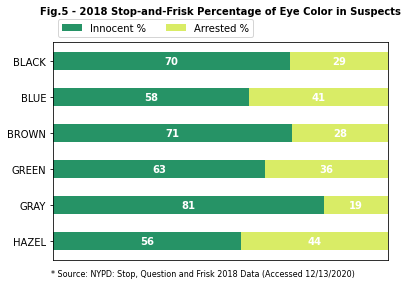

In [77]:
# Horizontal stacked bar graph of eye color, showing the percentage of innocent and those who were arrested
category_names = ['Innocent %', 'Arrested %']
results = {
    'BLACK': [70.7,29.3],
    'BLUE': [58.6,41.4],
    'BROWN': [71.3,28.7],
    'GREEN': [63.3,36.7],
    'GRAY': [81.0, 19.0],
    'HAZEL': [56.0, 44.0]
}
  

def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('summer')(np.linspace(0.15, .85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.set_title("Fig.5 - 2018 Stop-and-Frisk Percentage of Eye Color in Suspects", fontsize=10,y=1.1, fontweight="bold")
    
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())


    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b,_ = color
        text_color = 'white' if r * g * b < 0.5 else 'blue'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color, fontweight="bold")
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='medium')
    txt1 = '* Source: NYPD: Stop, Question and Frisk 2018 Data (Accessed 12/13/2020)'
    plt.text(-.6,6, txt1, ha='left', fontsize=8)
    return fig, ax


survey(results, category_names)
plt.show()

In [78]:
# Using race_df to mean the function of "SUSPECT_RACE_DESCRIPTION"
race_df = df['SUSPECT_RACE_DESCRIPTION']

In [79]:
# values of this specific column
race_df

0                                 WHITE
1                        BLACK HISPANIC
2                        WHITE HISPANIC
3        AMERICAN INDIAN/ALASKAN NATIVE
4                                 WHITE
                      ...              
11003                             BLACK
11004                    BLACK HISPANIC
11005                    BLACK HISPANIC
11006                    BLACK HISPANIC
11007                             BLACK
Name: SUSPECT_RACE_DESCRIPTION, Length: 11008, dtype: object

In [80]:
# 5th Hypothesis between race groups and result of stop-and-frisk
# Creating a two way frequency table of result of stop and race
race1_df = pd.crosstab(index=df["Measurable_Result of stop"], columns=df["SUSPECT_RACE_DESCRIPTION"]) 

In [81]:
# new table with race and result of stop
race1_df

SUSPECT_RACE_DESCRIPTION,0,AMERICAN INDIAN/ALASKAN NATIVE,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,WHITE,WHITE HISPANIC
Measurable_Result of stop,,,,,,,
0,54,12,170,4532,726,771,1628
1,13,4,51,1709,252,303,783


In [82]:
# Using summary stat function on new dataframe
print('Summary Statistics of Other Race')
summary_statistics(race1_df, '0')
print('-----------------------------------------------------------')
print('Summary Statistics of American Indian/Alaskan Native Race:')
summary_statistics(race1_df, 'AMERICAN INDIAN/ALASKAN NATIVE')
print('-----------------------------------------------------------')
print('Summary Statistics of Asian/Pacific Islander Race:')
summary_statistics(race1_df, 'ASIAN / PACIFIC ISLANDER')
print('-----------------------------------------------------------')
print('Summary Statistics of Black Race:')
summary_statistics(race1_df, 'BLACK')
print('-----------------------------------------------------------')
print('Summary Statistics of Black Hispanic Race:')
summary_statistics(race1_df, 'BLACK HISPANIC')
print('-----------------------------------------------------------')
print('Summary Statistics of White Race:')
summary_statistics(race1_df, 'WHITE')
print('-----------------------------------------------------------')
print('Summary Statistics of White Hispanic Race:')
summary_statistics(race1_df, 'WHITE HISPANIC')
print('-----------------------------------------------------------')

Summary Statistics of Other Race
Average: 33.5
Median: 33.5
Variance: 420.25
IQR: 0.0
-----------------------------------------------------------
Summary Statistics of American Indian/Alaskan Native Race:
Average: 8.0
Median: 8.0
Variance: 16.0
IQR: 0.0
-----------------------------------------------------------
Summary Statistics of Asian/Pacific Islander Race:
Average: 110.5
Median: 110.5
Variance: 3540.25
IQR: 0.0
-----------------------------------------------------------
Summary Statistics of Black Race:
Average: 3120.5
Median: 3120.5
Variance: 1992332.25
IQR: 0.0
-----------------------------------------------------------
Summary Statistics of Black Hispanic Race:
Average: 489.0
Median: 489.0
Variance: 56169.0
IQR: 0.0
-----------------------------------------------------------
Summary Statistics of White Race:
Average: 537.0
Median: 537.0
Variance: 54756.0
IQR: 0.0
-----------------------------------------------------------
Summary Statistics of White Hispanic Race:
Average: 120

In [83]:
# List of columns
race1_df.columns

Index(['0', 'AMERICAN INDIAN/ALASKAN NATIVE', 'ASIAN / PACIFIC ISLANDER',
       'BLACK', 'BLACK HISPANIC', 'WHITE', 'WHITE HISPANIC'],
      dtype='object', name='SUSPECT_RACE_DESCRIPTION')

In [84]:
# changing order of table
race_total_df = race1_df[['BLACK','BLACK HISPANIC','WHITE','WHITE HISPANIC','ASIAN / PACIFIC ISLANDER','AMERICAN INDIAN/ALASKAN NATIVE','0']]

In [85]:
# Calculating the sum of values in table
total = 0
for race in race1_df.columns:
    total += np.sum(race1_df[race])
print(total)

11008


In [86]:
# calculating chi-squared analysis among 2 qualitative variables.

from scipy import stats

chi2, p, dof, expected = stats.chi2_contingency(race1_df)

print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)

chi2: 32.07579371782723
p: 1.578066743114699e-05
dof: 6
expected: [[  48.04060683   11.47238372  158.46230015 4474.94667515  701.24945494
   770.08375727 1728.74482195]
 [  18.95939317    4.52761628   62.53769985 1766.05332485  276.75054506
   303.91624273  682.25517805]]


In [87]:
# Statistical analysis from chi-squared test indicated
# that the observed distribution between race and results of Stop-and-Frisk is strong
# chi^2(6, N = 11008)=32; p < 0.001


In [88]:
# Obtaining the percentage per race
race1_df['0_per'] = race1_df['0'] / sum(race1_df['0'])*100
race1_df['AMERICAN INDIAN/ALASKAN NATIVE_per'] = race1_df['AMERICAN INDIAN/ALASKAN NATIVE'] / sum(race1_df['AMERICAN INDIAN/ALASKAN NATIVE'])*100
race1_df['ASIAN / PACIFIC ISLANDER_per'] = race1_df['ASIAN / PACIFIC ISLANDER'] / sum(race1_df['ASIAN / PACIFIC ISLANDER'])*100
race1_df['BLACK_per'] = race1_df['BLACK'] / sum(race1_df['BLACK'])*100
race1_df['BLACK HISPANIC_per'] = race1_df['BLACK HISPANIC'] / sum(race1_df['BLACK HISPANIC'])*100
race1_df['WHITE_per'] = race1_df['WHITE'] / sum(race1_df['WHITE'])*100
race1_df['WHITE HISPANIC_per'] = race1_df['WHITE HISPANIC'] / sum(race1_df['WHITE HISPANIC'])*100
race1_df = race1_df[['0_per','AMERICAN INDIAN/ALASKAN NATIVE_per','ASIAN / PACIFIC ISLANDER_per','BLACK_per','BLACK HISPANIC_per','WHITE_per','WHITE HISPANIC_per']]
race1_df

SUSPECT_RACE_DESCRIPTION,0_per,AMERICAN INDIAN/ALASKAN NATIVE_per,ASIAN / PACIFIC ISLANDER_per,BLACK_per,BLACK HISPANIC_per,WHITE_per,WHITE HISPANIC_per
Measurable_Result of stop,,,,,,,
0,80.597015,75.0,76.923077,72.616568,74.233129,71.787709,67.523849
1,19.402985,25.0,23.076923,27.383432,25.766871,28.212291,32.476151


In [89]:
# Changing the order of the data frame
race1_df = race1_df[['BLACK_per', 'BLACK HISPANIC_per','WHITE_per', 'WHITE HISPANIC_per', 'ASIAN / PACIFIC ISLANDER_per','AMERICAN INDIAN/ALASKAN NATIVE_per','0_per']]

In [90]:
# Showing the new order of data frame
race1_df

SUSPECT_RACE_DESCRIPTION,BLACK_per,BLACK HISPANIC_per,WHITE_per,WHITE HISPANIC_per,ASIAN / PACIFIC ISLANDER_per,AMERICAN INDIAN/ALASKAN NATIVE_per,0_per
Measurable_Result of stop,,,,,,,
0,72.616568,74.233129,71.787709,67.523849,76.923077,75.0,80.597015
1,27.383432,25.766871,28.212291,32.476151,23.076923,25.0,19.402985


In [91]:
# Putting values in 1 decimal places for "0"
#race_innocent_values = [72.6, 74.2, 71.8, 67.5, 76.9, 75.0, 80.6]
race_innocent_values = ['72.6%', '74.2%', '71.8%', '67.5%', '76.9%', '75.0%', '80.6%']

# Putting values in 1 decimal places for "1"
race_arrested_values = ['27.4%', '25.8%', '28.2%', '32.5%', '23.1%', '25.0%', '19.4%']

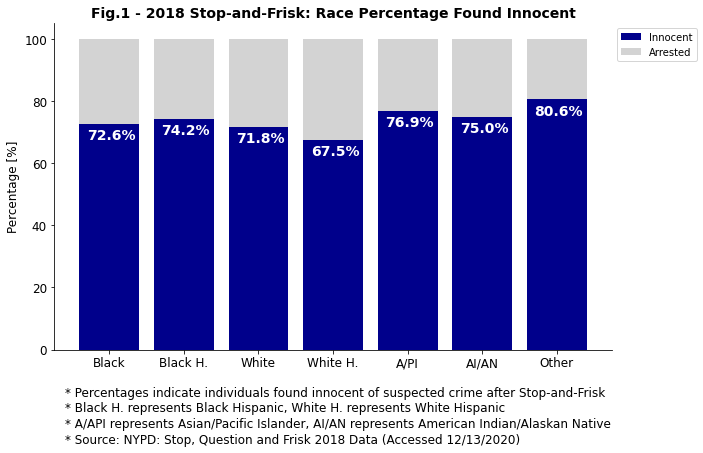

In [92]:
# Creating stacked bar graph percentage of race and result of stop
label = ['Black', 'Black H.', 'White','White H.','A/PI','AI/AN','Other']
y_value1 = race1_df.loc['0']
y_value2 = race1_df.loc['1']

fig, axs = plt.subplots(figsize=(10,6))     

p1 = axs.bar(label, y_value1, color='darkblue')     
p2 = axs.bar(label, y_value2, bottom=y_value1, color='lightgray')

axs.set_title("Fig.1 - 2018 Stop-and-Frisk: Race Percentage Found Innocent", fontsize=14, fontweight="bold")   

axs.set_ylabel("Percentage [%]", fontsize=12)
axs.tick_params(labelsize=12)  
axs.legend((p1[0],p2[0]),['Innocent','Arrested'], bbox_to_anchor=(1, 1))

axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)

for i in range(len(race_innocent_values)):
    plt.text(i-0.3,  y_value1[i] - 5, race_innocent_values[i], color='white', size=14,fontweight="bold")
    
    
txt="* Percentages indicate individuals found innocent of suspected crime after Stop-and-Frisk" 
plt.text(-.6,-15, txt, ha='left', fontsize=12)

txt1 = '* Black H. represents Black Hispanic, White H. represents White Hispanic'
plt.text(-.6,-20, txt1, ha='left', fontsize=12)
txt2 = '* A/API represents Asian/Pacific Islander, AI/AN represents American Indian/Alaskan Native'
plt.text(-.6,-25, txt2, ha='left', fontsize=12)
txt3 = '* Source: NYPD: Stop, Question and Frisk 2018 Data (Accessed 12/13/2020)'
plt.text(-.6,-30, txt3, ha='left', fontsize=12)

plt.show()

In [93]:
# finding the proportion difference of the total count
# This is just for researcher awareness purposes
def CI_prop_diff(s1, s2, n1, n2):
    p1 = s1 / n1
    p2 = s2 / n2
    se2p1 = p1 * (1 - p1) / n1
    se2p2 = p2 * (1 - p2) / n2
    se2 = se2p1 + se2p2
    se = np.sqrt(se2)
    low = (p1 - p2) - 1.96 * se
    up = (p1 - p2) + 1.96 * se
    print("Proportion difference is:", p1 - p2)
    print("95% CI is: ({}, {})".format(low, up))

In [94]:
race_total_df

SUSPECT_RACE_DESCRIPTION,BLACK,BLACK HISPANIC,WHITE,WHITE HISPANIC,ASIAN / PACIFIC ISLANDER,AMERICAN INDIAN/ALASKAN NATIVE,0
Measurable_Result of stop,,,,,,,
0,4532,726,771,1628,170,12,54
1,1709,252,303,783,51,4,13


In [95]:
# Adding a column to the data frame that adds all values in each row
race_total_df['Total'] = race_total_df['BLACK'] + race_total_df['BLACK HISPANIC'] + race_total_df['WHITE'] + race_total_df['WHITE HISPANIC'] + race_total_df['ASIAN / PACIFIC ISLANDER'] + race_total_df['AMERICAN INDIAN/ALASKAN NATIVE'] + race_total_df['0']
race_total_df

<ipython-input-95-9ac9a7a73729>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_total_df['Total'] = race_total_df['BLACK'] + race_total_df['BLACK HISPANIC'] + race_total_df['WHITE'] + race_total_df['WHITE HISPANIC'] + race_total_df['ASIAN / PACIFIC ISLANDER'] + race_total_df['AMERICAN INDIAN/ALASKAN NATIVE'] + race_total_df['0']


SUSPECT_RACE_DESCRIPTION,BLACK,BLACK HISPANIC,WHITE,WHITE HISPANIC,ASIAN / PACIFIC ISLANDER,AMERICAN INDIAN/ALASKAN NATIVE,0,Total
Measurable_Result of stop,,,,,,,,
0,4532,726,771,1628,170,12,54,7893
1,1709,252,303,783,51,4,13,3115


In [96]:
# Identifies the proportion difference between the total numbers (N:11,008)
CI_prop_diff(s1=4532, s2=1709, n1=7893, n2=3115)

Proportion difference is: 0.025544018828069337
95% CI is: (0.0049431284819218616, 0.04614490917421681)
